# Naive Bayes  y has the client subscribed a term deposit? (binary : 0, 1)

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [24]:
import os
path=r'C:\Users\ANIL\Desktop\python\Naive bayes Algorithm\archive (6)'
os.chdir(path)

In [25]:
df = pd.read_csv('bank_customer_survey.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [26]:
df.shape

(45211, 17)

In [27]:
df.drop(['contact','pdays'], axis = 1)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,0,unknown,0
3,47,blue,married,unknown,no,1506,yes,no,5,may,92,1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,5,may,198,1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,17,nov,977,3,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,17,nov,456,2,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,17,nov,1127,5,3,success,1
45209,57,blue,married,secondary,no,668,no,no,17,nov,508,4,0,unknown,0


In [28]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [30]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [31]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [32]:
from sklearn import preprocessing
  
label_encoder = preprocessing.LabelEncoder()
def StrToFloat(x):
    df[x]= label_encoder.fit_transform(df[x])
    df[x].unique()
for i in df.columns:
    StrToFloat(i)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int32
 2   marital    45211 non-null  int32
 3   education  45211 non-null  int32
 4   default    45211 non-null  int32
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int32
 7   loan       45211 non-null  int32
 8   contact    45211 non-null  int32
 9   day        45211 non-null  int64
 10  month      45211 non-null  int32
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int32
 16  y          45211 non-null  int64
dtypes: int32(9), int64(8)
memory usage: 4.3 MB


In [34]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,0,3,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3,0
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,9,1,2,0,1741,0,0,0,16,9,975,2,0,0,3,1
45207,53,5,0,0,0,2639,0,0,0,16,9,456,1,0,0,3,1
45208,54,5,1,1,0,5455,0,0,0,16,9,1116,4,181,3,2,1
45209,39,1,1,1,0,1584,0,0,1,16,9,508,3,0,0,3,0


In [35]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

# Visualization of the data

0    39922
1     5289
Name: y, dtype: int64


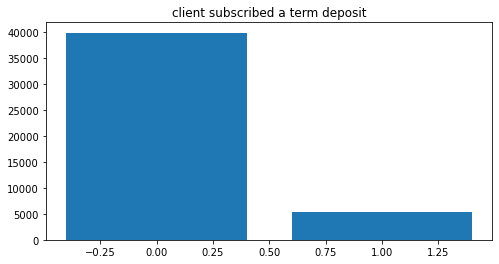

In [61]:
y_count=df['y'].value_counts()
print(y_count)
f=plt.figure()
f.set_figwidth(8)
f.set_figheight(4)
plt.bar(y_count.index,y_count.values)
plt.title('client subscribed a term deposit')
plt.show()

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'job'}>,
        <AxesSubplot:title={'center':'marital'}>,
        <AxesSubplot:title={'center':'education'}>],
       [<AxesSubplot:title={'center':'default'}>,
        <AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'housing'}>,
        <AxesSubplot:title={'center':'loan'}>],
       [<AxesSubplot:title={'center':'contact'}>,
        <AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'duration'}>],
       [<AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>,
        <AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'poutcome'}>],
       [<AxesSubplot:title={'center':'y'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

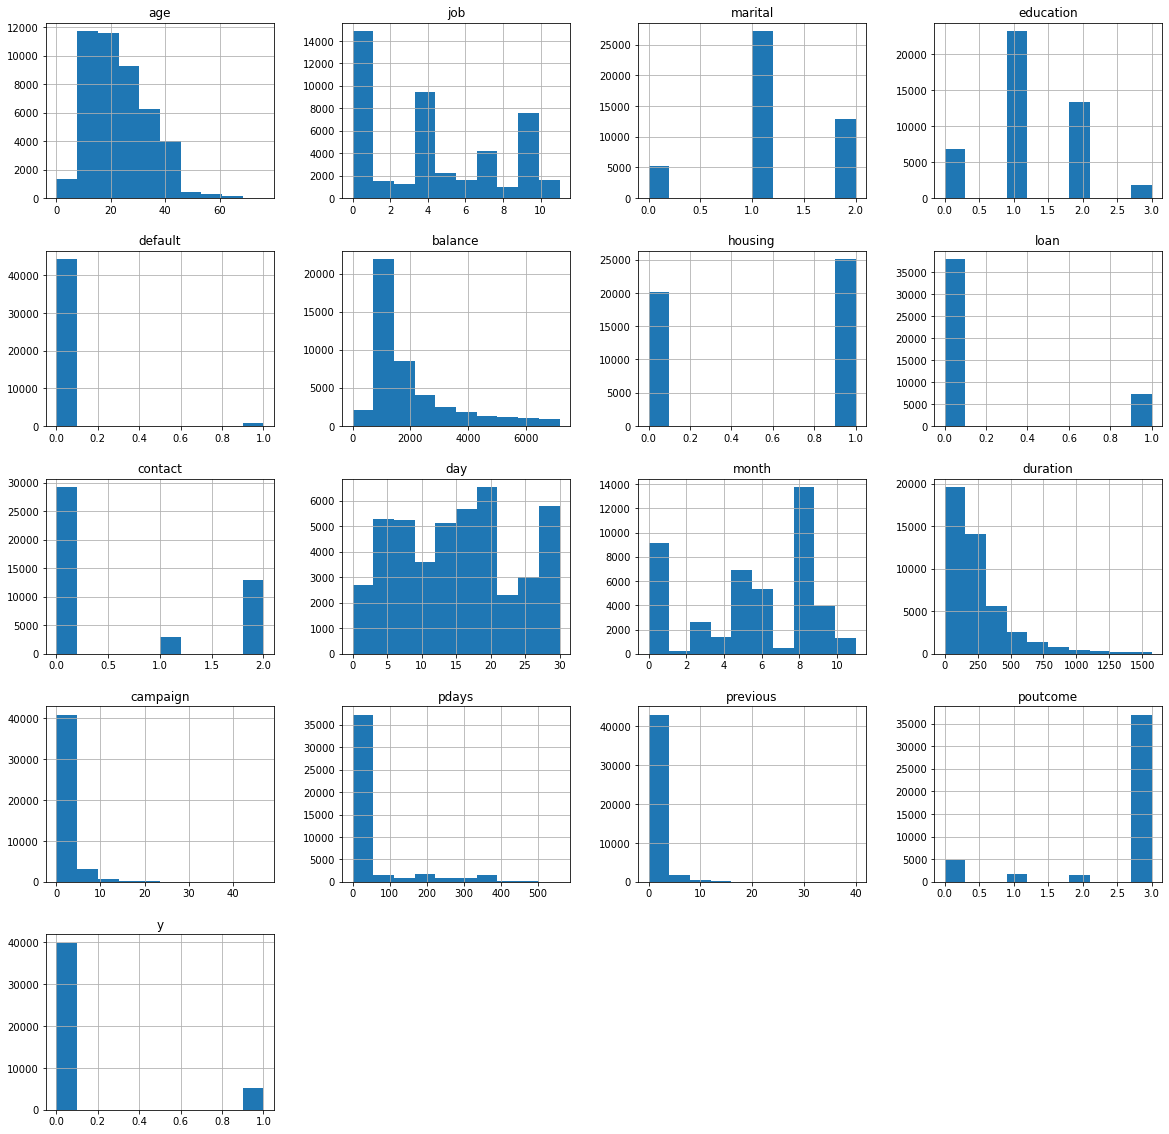

In [54]:
df.hist(figsize=(20,20))

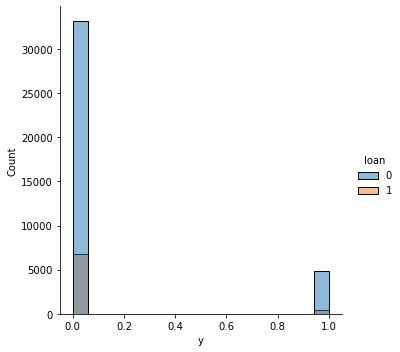

In [55]:
sns.displot(df, x="y",hue="loan", kde=False)

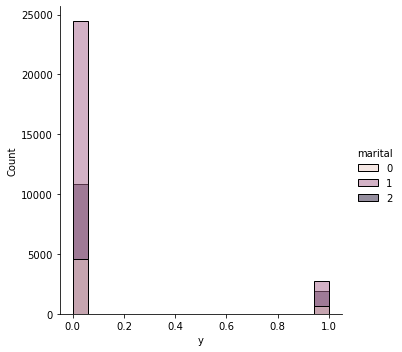

In [57]:
sns.displot(df, x="y",hue="marital", kde=False)

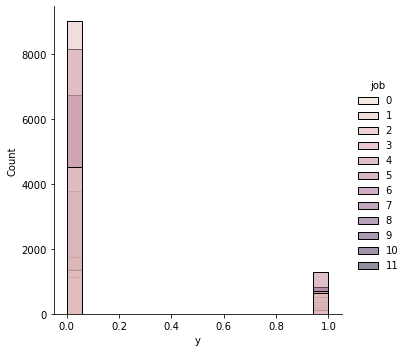

In [58]:
sns.displot(df, x="y",hue="job", kde=False)

<AxesSubplot:>

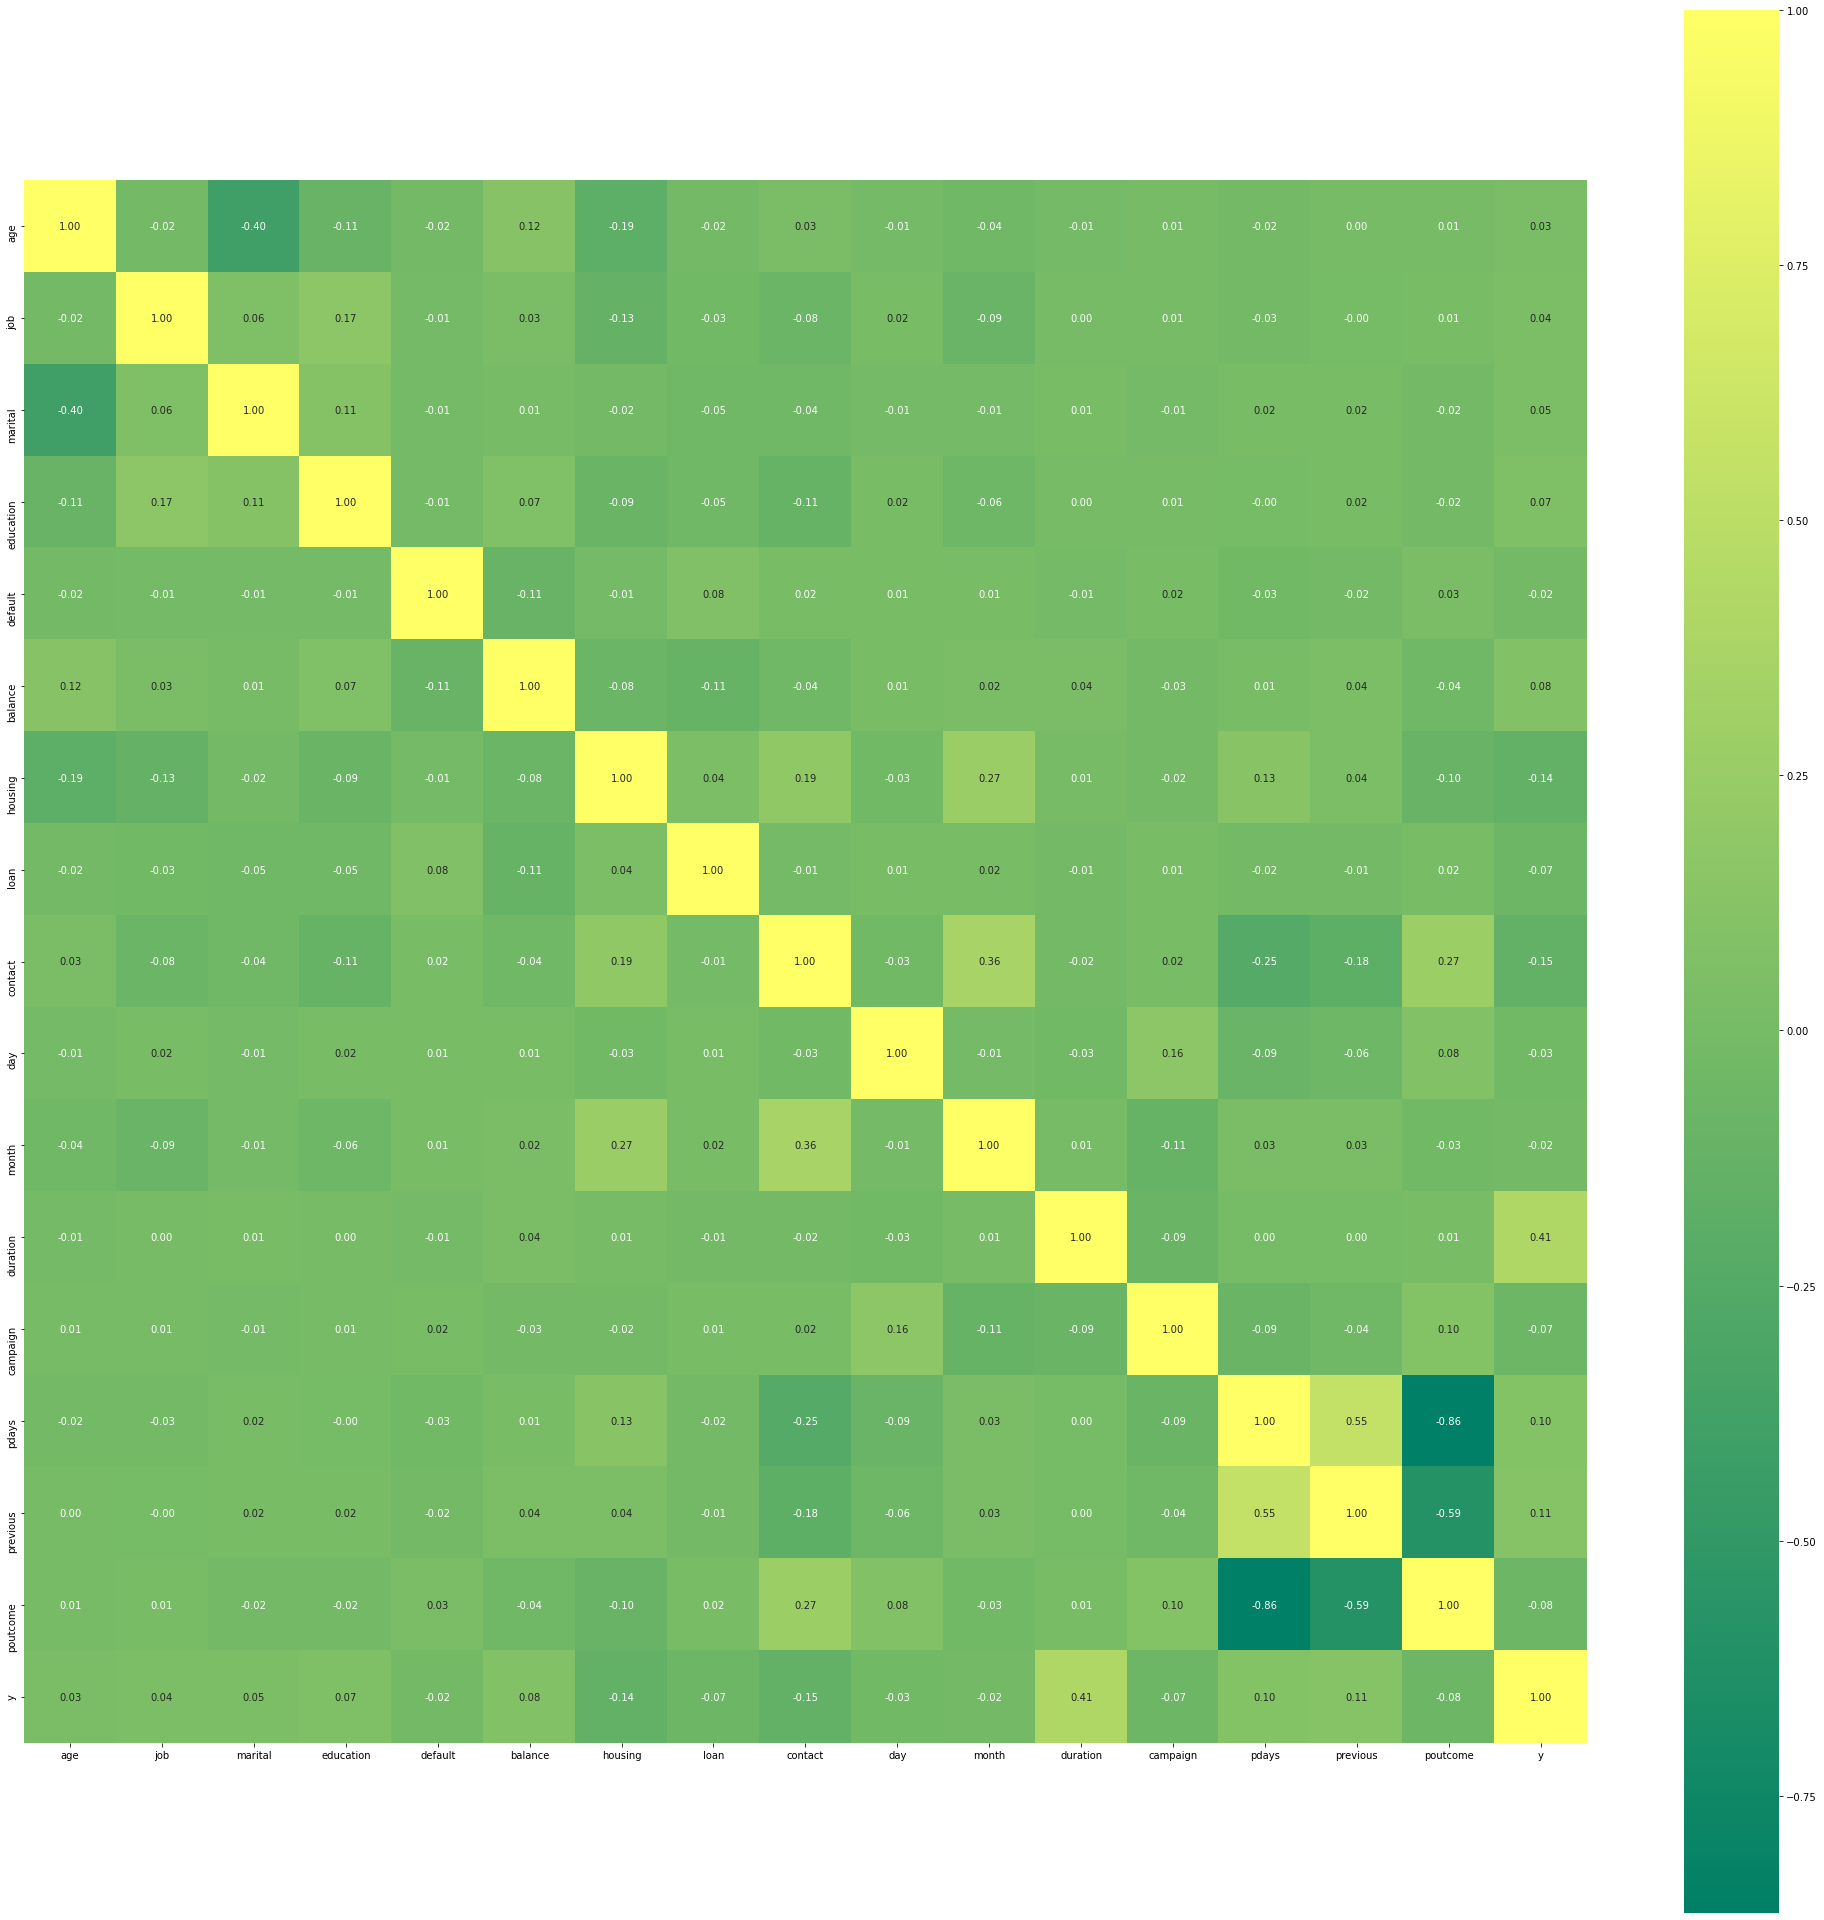

In [62]:
plt.figure(figsize=(35,35)) 
sns.heatmap(df.corr(), vmax=1, square=True, annot=True, fmt='.2f', cmap="summer")

<AxesSubplot:ylabel='y'>

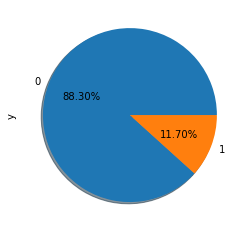

In [63]:
df['y'].value_counts().plot.pie(autopct='%1.2f%%',shadow=True)

## Splitting the dataset into the Training set and Test set

In [36]:
X=df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']]
y=df['y']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [38]:
print(X_train)

       age  job  marital  education  default  balance  housing  loan  contact  \
24951   40    4        1          0        0     1937        0     0        2   
22129   37    1        1          3        0     1112        0     0        0   
986     32    0        1          1        0     1075        1     0        2   
14999   25    4        1          0        0     2784        1     0        0   
4027    35    9        0          2        0     1563        1     0        2   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
30403   17    4        2          2        0     1911        0     0        0   
21243   17    4        1          2        0     1666        1     0        0   
42613   17    4        1          2        0     1239        0     0        0   
43567   52    5        1          1        0     1532        0     0        0   
2732    28    1        2          1        0      973        1     0        2   

       day  month  duration

In [39]:
print(y_train)

24951    0
22129    0
986      0
14999    0
4027     0
        ..
30403    0
21243    0
42613    1
43567    0
2732     0
Name: y, Length: 31647, dtype: int64


In [40]:
print(X_test)

       age  job  marital  education  default  balance  housing  loan  contact  \
14001   19    4        1          2        0     2319        1     0        0   
32046   18    7        2          1        0      663        1     0        0   
13318   29    1        1          0        0      516        0     1        1   
42991   39    3        1          0        0     1417        1     1        0   
14237   15    1        1          1        1      516        1     1        0   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
2666    13    9        1          2        0      916        1     1        2   
35730   30    1        1          1        0     5181        1     0        1   
11495   21    3        1          2        0      920        1     1        2   
20975   24    9        1          2        0     6795        0     1        0   
31975   20    1        1          1        0     2574        1     0        0   

       day  month  duration

In [41]:
print(y_test)

14001    0
32046    1
13318    0
42991    0
14237    0
        ..
2666     0
35730    0
11495    0
20975    0
31975    0
Name: y, Length: 13564, dtype: int64


## Feature Scaling

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [43]:
print(X_train)

[[ 1.61533375 -0.10586083 -0.27522248 ... -0.4140009  -0.30452559
   0.44500447]
 [ 1.33183358 -1.02355015 -0.27522248 ... -0.4140009  -0.30452559
   0.44500447]
 [ 0.8593333  -1.32944659 -0.27522248 ... -0.4140009  -0.30452559
   0.44500447]
 ...
 [-0.55816755 -0.10586083 -0.27522248 ... -0.4140009  -0.30452559
   0.44500447]
 [ 2.74933443  0.2000356  -0.27522248 ...  1.43595975  0.22534693
  -2.58556501]
 [ 0.48133307 -1.02355015  1.36352933 ... -0.4140009  -0.30452559
   0.44500447]]


In [44]:
print(X_test)

[[-0.36916744 -0.10586083 -0.27522248 ... -0.4140009  -0.30452559
   0.44500447]
 [-0.4636675   0.81182848  1.36352933 ... -0.4140009  -0.30452559
   0.44500447]
 [ 0.57583313 -1.02355015 -0.27522248 ... -0.4140009  -0.30452559
   0.44500447]
 ...
 [-0.18016733 -0.41175727 -0.27522248 ... -0.4140009  -0.30452559
   0.44500447]
 [ 0.10333284  1.42362136 -0.27522248 ... -0.4140009  -0.30452559
   0.44500447]
 [-0.27466738 -1.02355015 -0.27522248 ...  2.93453122  0.22534693
  -2.58556501]]


## Training the Naive Bayes model on the Training set

In [45]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [46]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,0,3,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3,0
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,9,1,2,0,1741,0,0,0,16,9,975,2,0,0,3,1
45207,53,5,0,0,0,2639,0,0,0,16,9,456,1,0,0,3,1
45208,54,5,1,1,0,5455,0,0,0,16,9,1116,4,181,3,2,1
45209,39,1,1,1,0,1584,0,0,1,16,9,508,3,0,0,3,0


## Predicting a new result

In [47]:
print(classifier.predict(sc.transform([[40,4,1,2,0,3036,1,0,2,4,8,261,0,0,0,3]])))

[0]


## Predicting the Test set results

In [48]:
y_pred = classifier.predict(X_test)
print(np.concatenate((np.array(y_pred).reshape(len(y_pred),1), np.array(y_test).reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 0]]


## Making the Confusion Matrix

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[10527  1442]
 [  767   828]]


0.8371424358596284

## Visualising the Training set results

In [50]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Recency', 'Frequency', 'Monetary', 'Time')
plt.ylabel('Class')
plt.legend()
plt.show()

ValueError: X has 2 features, but StandardScaler is expecting 16 features as input.

## Visualising the Test set results

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Recency')
plt.ylabel('Class')
plt.legend()
plt.show()